In [8]:
# Stacked LSTM for international airline passengers problem with memory
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import os
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Epoch 1/10
583/583 - 11s - loss: 0.0205
Epoch 2/10
583/583 - 2s - loss: 0.0178
Epoch 3/10
583/583 - 2s - loss: 0.0162
Epoch 4/10
583/583 - 2s - loss: 0.0144
Epoch 5/10
583/583 - 1s - loss: 0.0132
Epoch 6/10
583/583 - 1s - loss: 0.0125
Epoch 7/10
583/583 - 2s - loss: 0.0119
Epoch 8/10
583/583 - 1s - loss: 0.0115
Epoch 9/10
583/583 - 2s - loss: 0.0111
Epoch 10/10
583/583 - 2s - loss: 0.0108
Epoch 1/10
583/583 - 2s - loss: 0.0106
Epoch 2/10
583/583 - 2s - loss: 0.0105
Epoch 3/10
583/583 - 1s - loss: 0.0104
Epoch 4/10
583/583 - 1s - loss: 0.0103
Epoch 5/10
583/583 - 1s - loss: 0.0103
Epoch 6/10
583/583 - 1s - loss: 0.0102
Epoch 7/10
583/583 - 1s - loss: 0.0102
Epoch 8/10
583/583 - 1s - loss: 0.0102
Epoch 9/10
583/583 - 1s - loss: 0.0102
Epoch 10/10
583/583 - 1s - loss: 0.0102
Epoch 1/10
583/583 - 1s - loss: 0.0101
Epoch 2/10
583/583 - 1s - loss: 0.0102
Epoch 3/10
583/583 - 1s - loss: 0.0102
Epoch 4/10
583/583 - 1s - loss: 0.0102
Epoch 5/10
583/583 - 1s - loss: 0.0102
Epoch 6/10
583/583 - 1

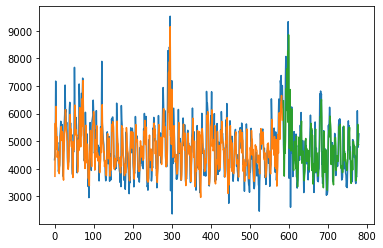

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
dataframe = pd.read_csv(os.path.basename(file), usecols = [1],
                      engine = "python")

# load the dataset
#dataframe = read_csv('Rossmann_Store1_Data_FULL.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [10]:
#Output to csv file
out = testPredict.astype(numpy.int)
#pd.DataFrame(out).to_csv(r'C:\Users\gurpr\Videos\BetaSci\SLSTM_lookback30_i100_epochs1_bs1.csv', index=False, header=False)